# **Segmentation of Water Bodies**

## **Dataset Description**

Title: Satellite Images of Water Bodies

Source: [Kaggle](https://www.kaggle.com/datasets/franciscoescobar/satellite-images-of-water-bodies)

Description: A collection of water bodies images captured by the Sentinel-2 Satellite. Each image comes with a black and white mask where white represents water and black represents something else but water. The masks were generated by calculating the NWDI (Normalized Water Difference Index) which is frequently used to detect and measure vegetation in satellite images, but a greater threshold was used to detect water bodies.

- **Images**: These are the raw satellite images.
- **Masks**: These are the binary masks where water bodies are labeled.

### Example Images and Masks

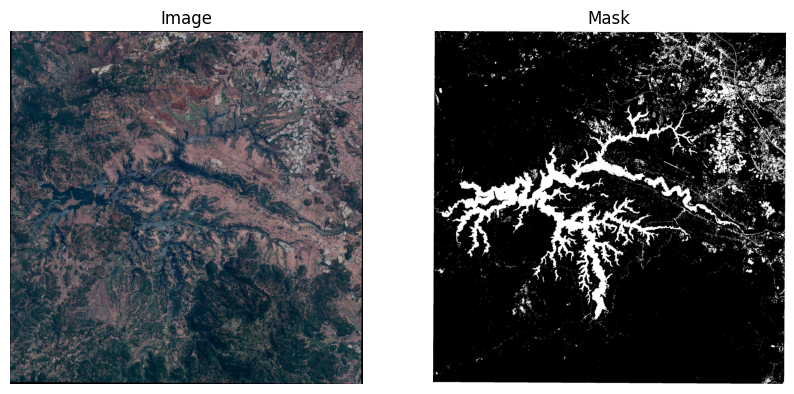

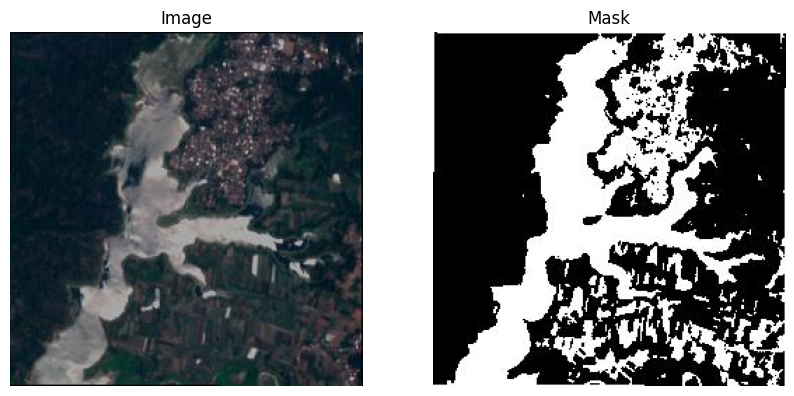

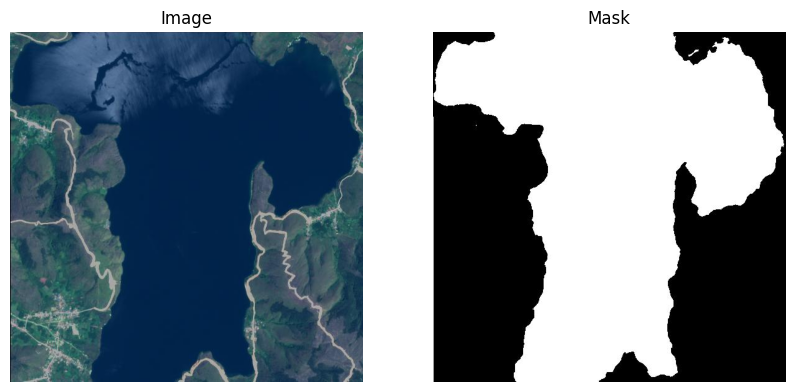

In [5]:
import matplotlib.pyplot as plt
import cv2
import os

# Define the paths to the images and masks
image_path = './data/Images/'
mask_path = './data/Masks/'

# Function to display image and mask
def display_image_and_mask(image_file):
    image = cv2.imread(os.path.join(image_path, image_file))
    mask = cv2.imread(os.path.join(mask_path, image_file), cv2.IMREAD_GRAYSCALE)
    
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    axes[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    axes[0].set_title('Image')
    axes[0].axis('off')
    
    axes[1].imshow(mask, cmap='gray')
    axes[1].set_title('Mask')
    axes[1].axis('off')
    
    plt.show()

# Display a few examples
sample_images = ['water_body_1.jpg', 'water_body_10.jpg', 'water_body_100.jpg']
for img in sample_images:
    display_image_and_mask(img)

## **Preprocessing**

In this section, we will preprocess the images and masks to make them suitable for segmentation. The preprocessing steps include resizing the images and masks, normalizing the pixel values, and any other necessary transformations.

### Resizing Images and Masks


In [2]:
import numpy as np

def preprocess_image(image, target_size=(256, 256)):
    image = cv2.resize(image, target_size)
    image = image / 255.0  # Normalize to [0, 1]
    return image

def preprocess_mask(mask, target_size=(256, 256)):
    mask = cv2.resize(mask, target_size, interpolation=cv2.INTER_NEAREST)
    mask = mask / 255.0  # Normalize to [0, 1]
    mask = np.round(mask).astype(np.uint8)  # Ensure binary mask
    return mask

# Apply preprocessing to the sample images and masks
for img in sample_images:
    image = cv2.imread(os.path.join(image_path, img))
    mask = cv2.imread(os.path.join(mask_path, img), cv2.IMREAD_GRAYSCALE)
    
    preprocessed_image = preprocess_image(image)
    preprocessed_mask = preprocess_mask(mask)
    
    display_image_and_mask(preprocessed_image, preprocessed_mask)


TypeError: display_image_and_mask() takes 1 positional argument but 2 were given

## **Manual Segmentation**

To evaluate our segmentation algorithm, we will first manually segment a few images. This will serve as a ground truth to compare the automatic segmentation results.

### Manual Segmentation Example


## **Automatic Segmentation**

In this section, we will implement an automatic segmentation approach using a simple thresholding technique. More advanced methods, such as U-Net, can also be used for better performance.

### Thresholding Method


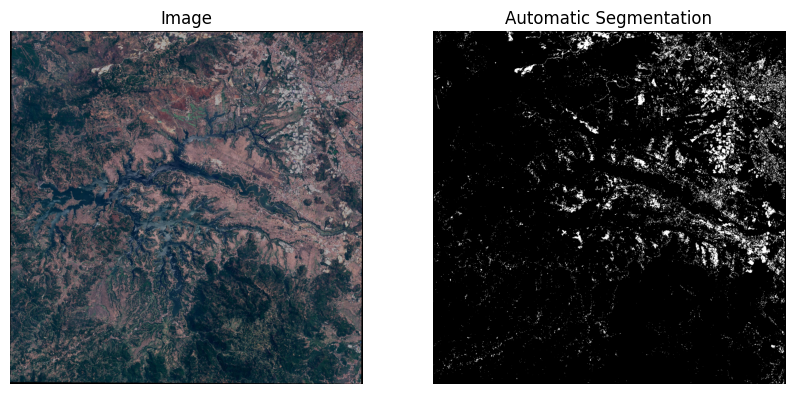

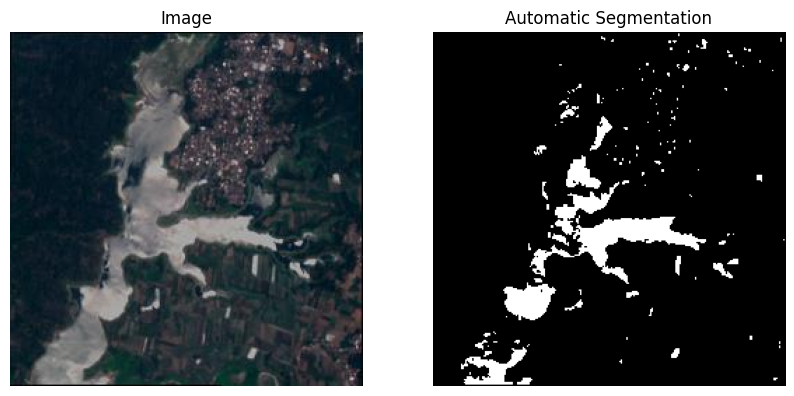

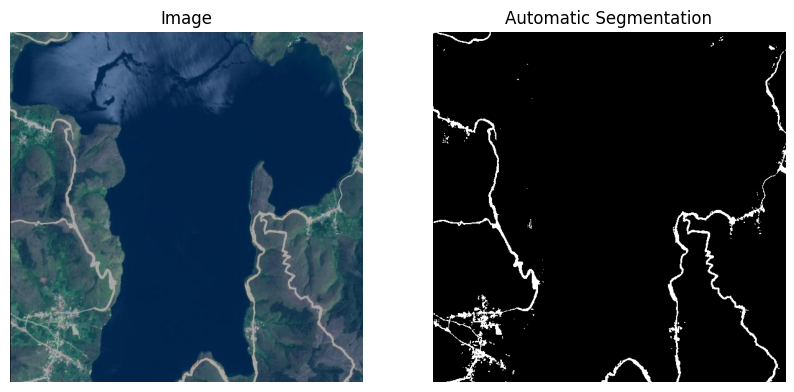

In [3]:
def automatic_segmentation(image):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    _, binary_mask = cv2.threshold(gray_image, 128, 255, cv2.THRESH_BINARY)
    return binary_mask

# Apply automatic segmentation to the sample images
for img in sample_images:
    image = cv2.imread(os.path.join(image_path, img))
    
    segmented_mask = automatic_segmentation(image)
    
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    axes[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    axes[0].set_title('Image')
    axes[0].axis('off')
    
    axes[1].imshow(segmented_mask, cmap='gray')
    axes[1].set_title('Automatic Segmentation')
    axes[1].axis('off')
    
    plt.show()


## **Evaluation**

To evaluate the performance of our segmentation algorithm, we will use the Intersection over Union (IoU) metric.

### IoU Calculation


In [4]:
def calculate_iou(mask_true, mask_pred):
    intersection = np.logical_and(mask_true, mask_pred)
    union = np.logical_or(mask_true, mask_pred)
    iou_score = np.sum(intersection) / np.sum(union)
    return iou_score

# Calculate IoU for the sample images
for img in sample_images:
    image = cv2.imread(os.path.join(image_path, img))
    mask_true = cv2.imread(os.path.join(mask_path, img), cv2.IMREAD_GRAYSCALE)
    
    preprocessed_image = preprocess_image(image)
    preprocessed_mask = preprocess_mask(mask_true)
    
    mask_pred = automatic_segmentation(preprocessed_image)
    mask_pred = preprocess_mask(mask_pred)
    
    iou_score = calculate_iou(preprocessed_mask, mask_pred)
    print(f'IoU for {img}: {iou_score:.2f}')


error: OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/color.simd_helpers.hpp:94: error: (-2:Unspecified error) in function 'cv::impl::(anonymous namespace)::CvtHelper<cv::impl::(anonymous namespace)::Set<3, 4, -1>, cv::impl::(anonymous namespace)::Set<1, -1, -1>, cv::impl::(anonymous namespace)::Set<0, 2, 5>, cv::impl::(anonymous namespace)::NONE>::CvtHelper(cv::InputArray, cv::OutputArray, int) [VScn = cv::impl::(anonymous namespace)::Set<3, 4, -1>, VDcn = cv::impl::(anonymous namespace)::Set<1, -1, -1>, VDepth = cv::impl::(anonymous namespace)::Set<0, 2, 5>, sizePolicy = cv::impl::(anonymous namespace)::NONE]'
> Unsupported depth of input image:
>     'VDepth::contains(depth)'
> where
>     'depth' is 6 (CV_64F)


## **Discussion**

### Results
- The IoU scores indicate the accuracy of our automatic segmentation method compared to the manual segmentation.

### Challenges
- Variability in water body appearances and environmental conditions can affect segmentation accuracy.
- Simple thresholding might not be sufficient for complex images.

### Future Work
- Implementing more advanced techniques like U-Net for better segmentation accuracy.
- Augmenting the dataset with more diverse samples to improve model robustness.


## **Conclusion**

In this project, we explored the segmentation of water bodies from satellite images using both manual and automatic methods. While simple thresholding provided a basic segmentation capability, more advanced techniques will be needed for better accuracy in complex scenarios.
